In [2]:
from utilityFunctions import load_csv_to_matrix_batch, compute_color_preference_raw_batch, compute_color_preference_distance_batch, show_heatmaps, compute_color_similarity_distance_batch, compute_correlations, RSA, split_and_average_matrices
from utilityFunctions_GWOT import compute_GWOT_for_all_pairs
import numpy as np
import pickle
import os
import random

unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
matrix_size = len(unique_colours)
response_type = 'similarity'

In [3]:
folder_path = 'raw_data/202411_data'

In [4]:
response_type = 'preference'
subject_matrices_preference = load_csv_to_matrix_batch(folder_path, response_type, colour_index, matrix_size)
subject_matrices_preference_raw = compute_color_preference_raw_batch(subject_matrices_preference)
subject_matrices_preference_distance = compute_color_preference_distance_batch(subject_matrices_preference)

Order of files being loaded:
raw_data/202411_data/subject_01_551325.csv
raw_data/202411_data/subject_02_5a9b20.csv
raw_data/202411_data/subject_03_5eb05d.csv
raw_data/202411_data/subject_04_609c10.csv
raw_data/202411_data/subject_05_60d129.csv
raw_data/202411_data/subject_06_610814.csv
raw_data/202411_data/subject_07_6171f3.csv
raw_data/202411_data/subject_08_65a3ab.csv
raw_data/202411_data/subject_09_65f13c.csv
raw_data/202411_data/subject_10_65f18d.csv
raw_data/202411_data/subject_11_65fa3b.csv
raw_data/202411_data/subject_12_663180.csv
raw_data/202411_data/subject_13_667c6c.csv
raw_data/202411_data/subject_14_667df4.csv
raw_data/202411_data/subject_15_668110.csv
raw_data/202411_data/subject_16_6681ad.csv
raw_data/202411_data/subject_17_66906a.csv
raw_data/202411_data/subject_18_66a502.csv
raw_data/202411_data/subject_19_6734b5.csv


In [5]:
def reorder_matrices_by_row_average(matrices):
    reordered_matrices = []
    
    for matrix in matrices:
        # Compute row-wise averages
        row_averages = np.mean(matrix, axis=1)
        # Get indices that would sort the rows by average (descending)
        sorted_indices = np.argsort(-row_averages)
        # Reorder rows and columns using the same sorted indices
        reordered_matrix = matrix[sorted_indices][:, sorted_indices]
        reordered_matrices.append(reordered_matrix)
    
    return reordered_matrices

In [6]:
subject_matrices_preference_raw_reordered = reorder_matrices_by_row_average(subject_matrices_preference_raw)
subject_matrices_preference_distance_reordered = reorder_matrices_by_row_average(subject_matrices_preference_distance)

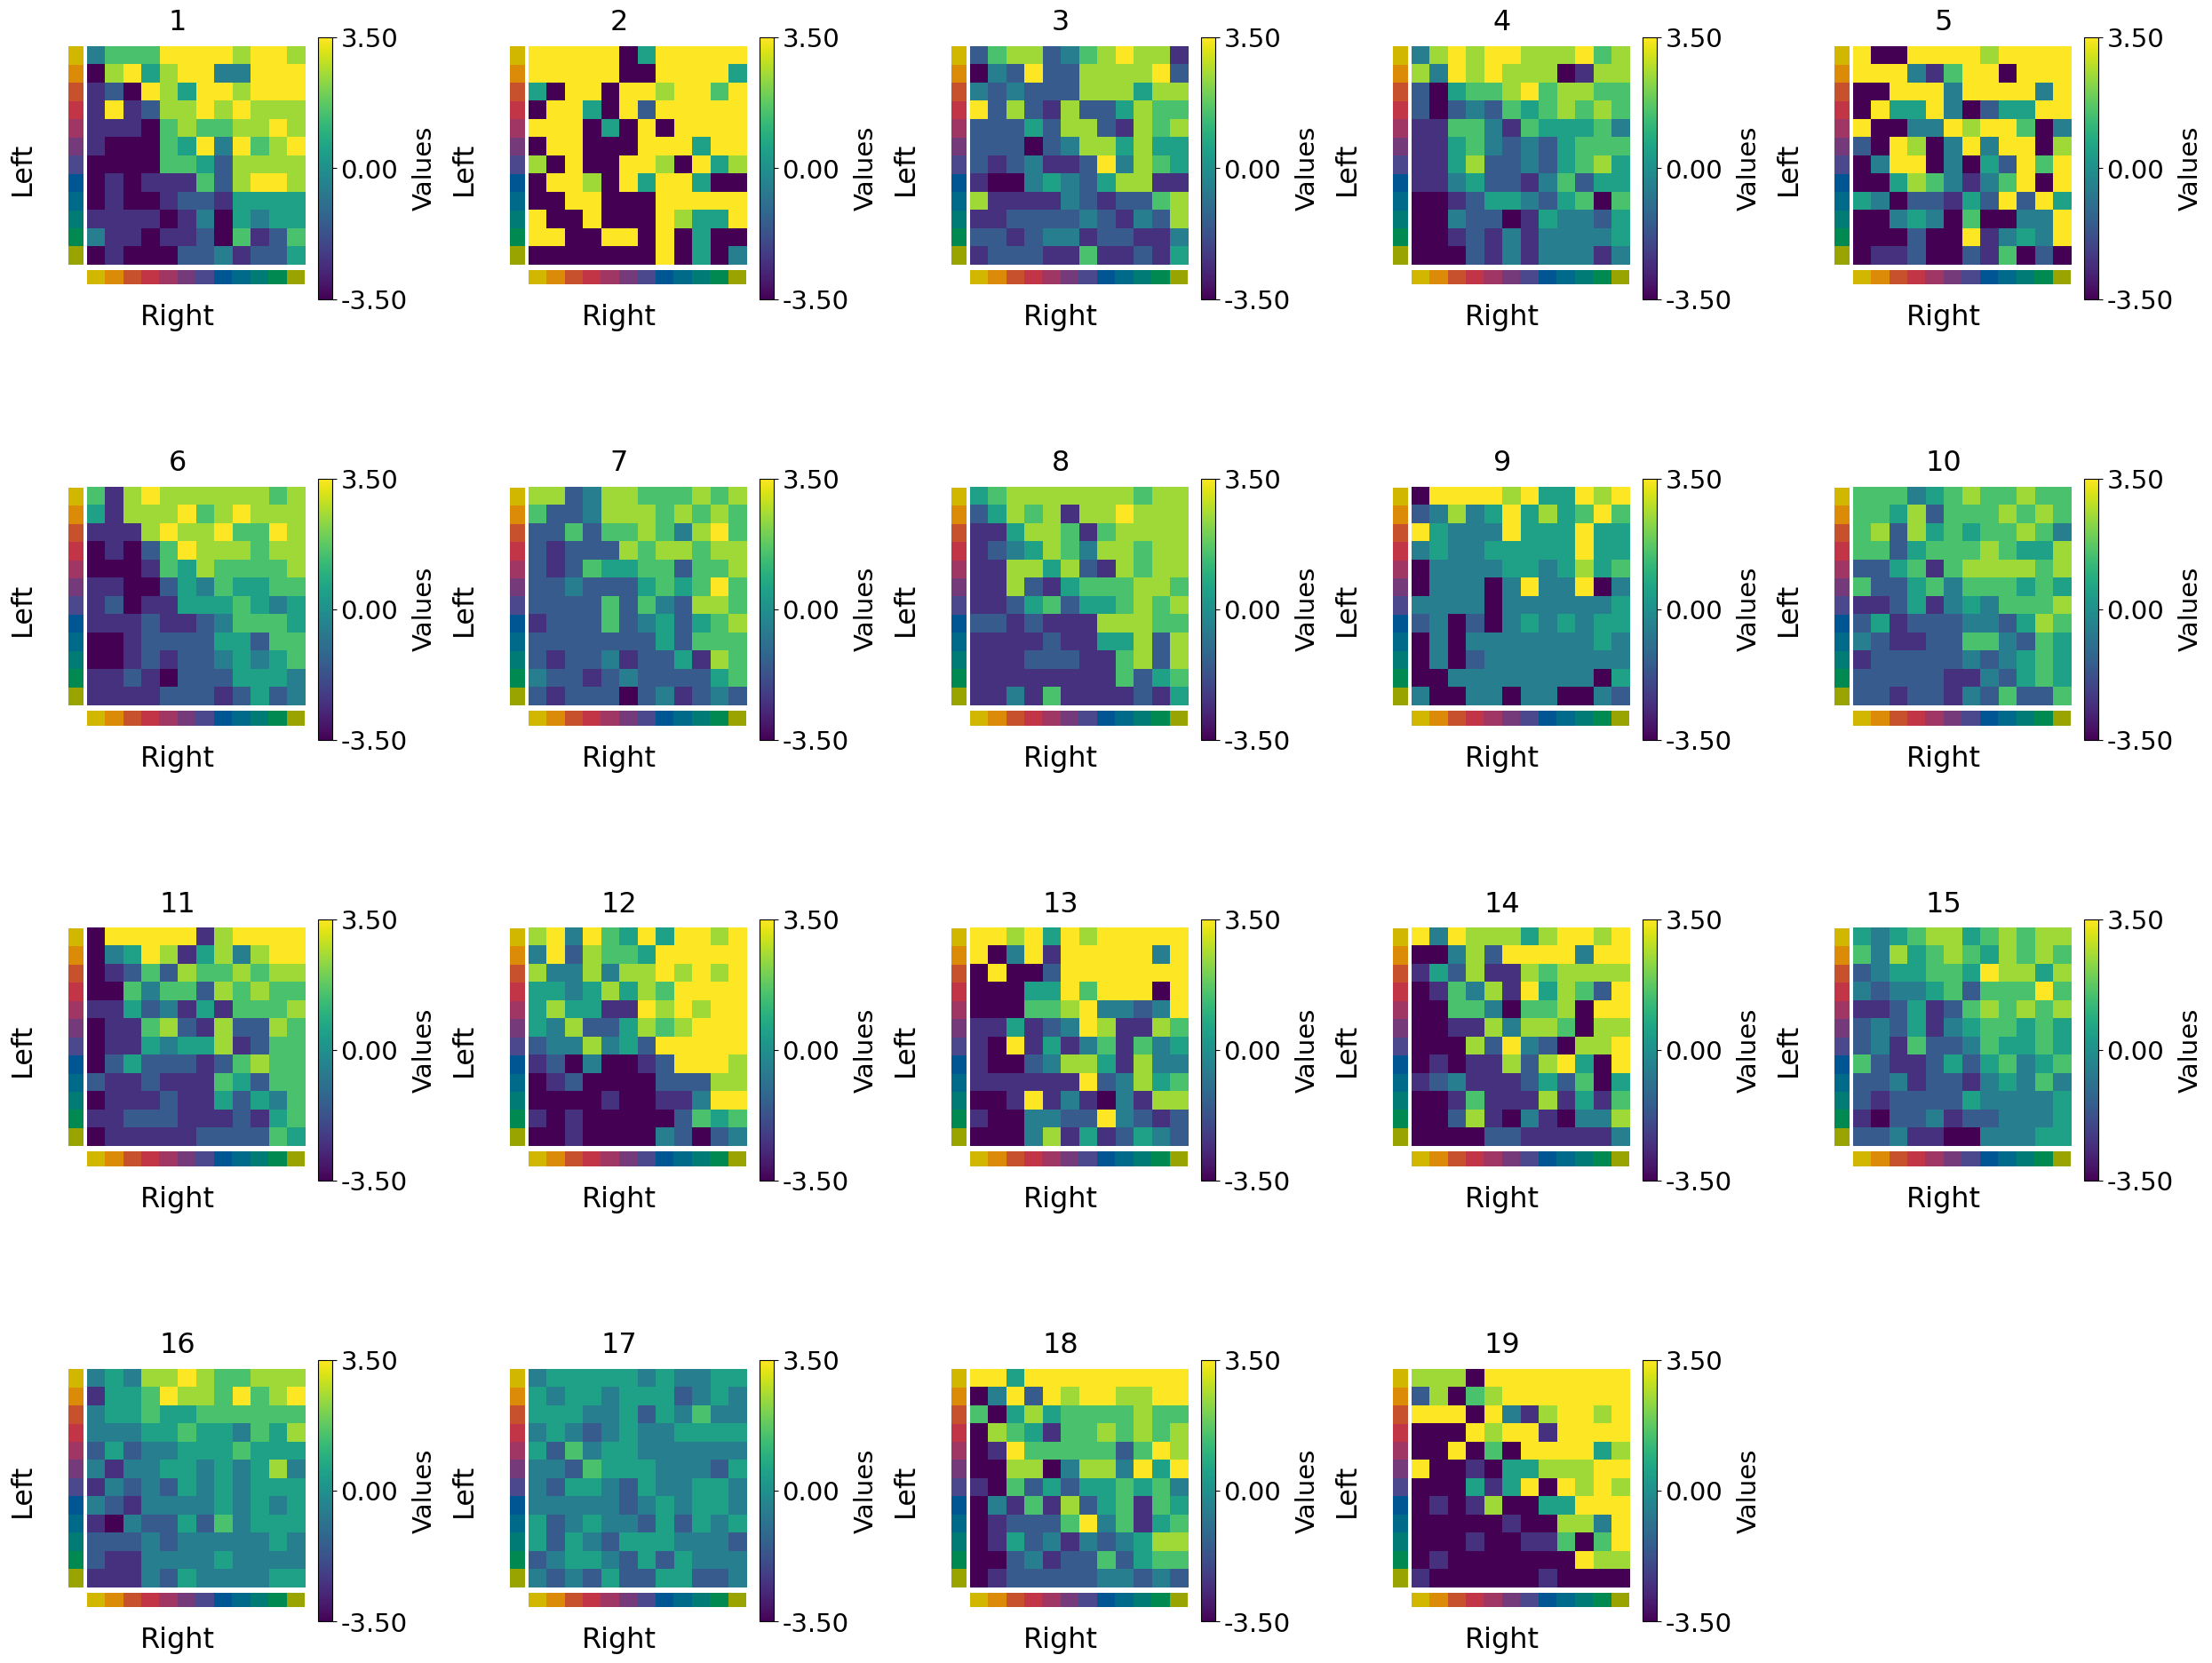

In [7]:
show_heatmaps(vmin_val=-3.5, vmax_val=3.5, matrices=list(subject_matrices_preference_raw_reordered), titles=list(range(1, 20)), nrows=4, ncols=5, cbar_label="Values", color_labels=unique_colours, cmap_name='viridis')

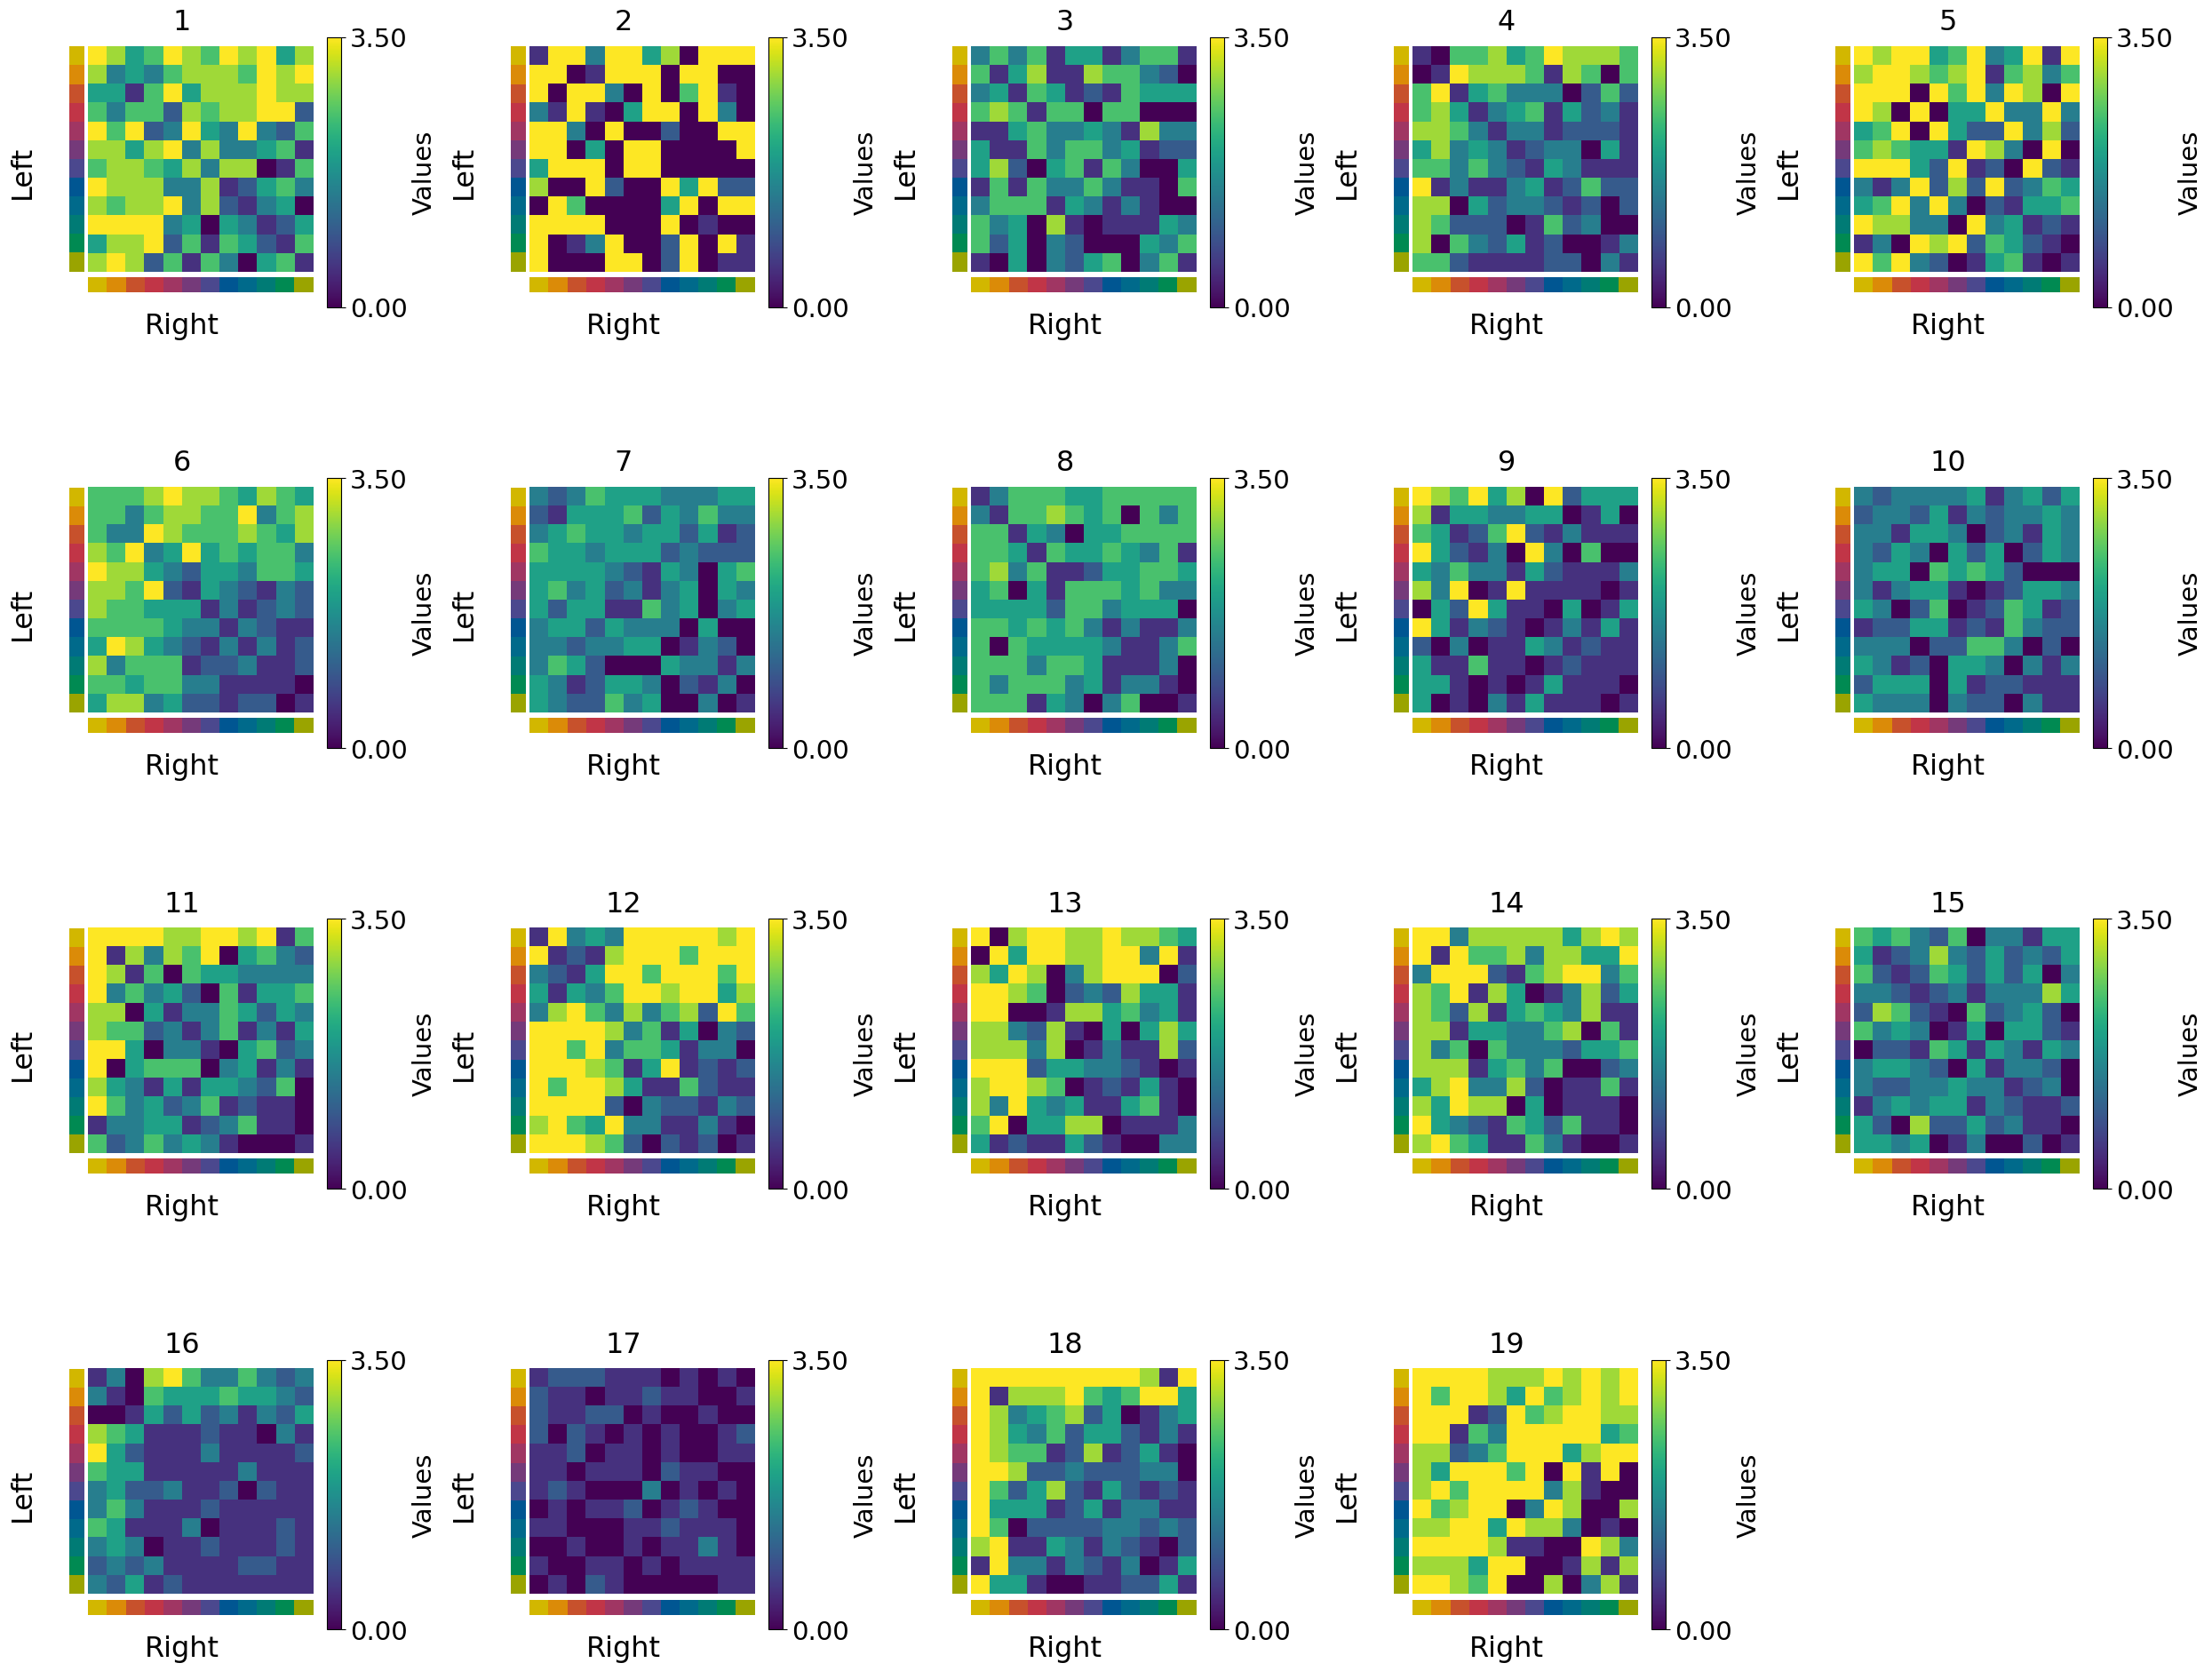

In [8]:
show_heatmaps(vmin_val=0, vmax_val=3.5, matrices=list(subject_matrices_preference_distance_reordered), titles=list(range(1, 20)), nrows=4, ncols=5, cbar_label="Values", color_labels=unique_colours, cmap_name='viridis')